In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir(r"C:\Users\ASUS\Desktop\DataSet\generating-data")

In [3]:
path = r"C:\Users\ASUS\Desktop\DataSet\generating-data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)

In [4]:
#Read in updated dataframe

all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,178459,usb-cables,1,50.75,01/04/20 07:13,"973 Main St, Hyderabad, TN 94016"
1,178460,Apple Airpods Headphones,1,150.0,30/04/20 13:43,"808 10th St, Hyderabad, TN 94016"
2,178461,usb-cables,1,50.75,14/04/20 12:37,"640 charminar St, vizag, AP 30301"
3,178462,lg electonics,1,555.25,03/04/20 12:07,"624 7th St, pune, M 73301"
4,178463,usb-cables,1,50.75,09/04/20 17:16,"129 7th St, Hyderabad, TN 94016"


In [5]:
all_data.shape

(188369, 6)

In [6]:
df = all_data.copy()

# Clean up the data!
The first step in this is figuring out what we need to clean. I have found in my experience, that we find things we need to clean as we perform operations and get errors. Based on the error, we decide how we should go about cleaning the data

In [7]:
# Check missing values
df.isnull().sum()

Order ID            1634
Product             1634
Quantity Ordered    1634
Price Each          1634
Order Date          1634
Purchase Address    1634
dtype: int64

In [8]:
# Find NAN
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
63,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN
228,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,178459,usb-cables,1,50.75,01/04/20 07:13,"973 Main St, Hyderabad, TN 94016"
1,178460,Apple Airpods Headphones,1,150.0,30/04/20 13:43,"808 10th St, Hyderabad, TN 94016"
2,178461,usb-cables,1,50.75,14/04/20 12:37,"640 charminar St, vizag, AP 30301"
3,178462,lg electonics,1,555.25,03/04/20 12:07,"624 7th St, pune, M 73301"
4,178463,usb-cables,1,50.75,09/04/20 17:16,"129 7th St, Hyderabad, TN 94016"


In [9]:
df['sno'] = range(1, len(df) + 1)
df = df.set_index('sno')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
sno,,,,,,
1,178459,usb-cables,1,50.75,01/04/20 07:13,"973 Main St, Hyderabad, TN 94016"
2,178460,Apple Airpods Headphones,1,150.0,30/04/20 13:43,"808 10th St, Hyderabad, TN 94016"
3,178461,usb-cables,1,50.75,14/04/20 12:37,"640 charminar St, vizag, AP 30301"
4,178462,lg electonics,1,555.25,03/04/20 12:07,"624 7th St, pune, M 73301"
5,178463,usb-cables,1,50.75,09/04/20 17:16,"129 7th St, Hyderabad, TN 94016"


In [10]:
df.shape

(186735, 6)

In [11]:
df['Order Date'].value_counts()

Order Date        342
08/12/20 11:18      7
02/10/20 20:51      6
05/09/20 21:14      6
29/06/20 20:19      6
                 ... 
25/01/20 11:15      1
02/08/20 03:55      1
20/06/20 20:42      1
03/06/20 13:01      1
09/11/20 15:39      1
Name: Order Date, Length: 144885, dtype: int64

In [12]:
df['Product'].value_counts()

usb-cables                  47192
Wired Headphones            42101
washing machines            14850
lg electonics               12276
macbook                     10172
iphone                       9316
samsung                      8572
Lightning Charging Cable     6874
nokia                        6596
asus                         5571
Desktops                     4160
sony tv                      4099
wireless headphones          3332
Apple Airpods Headphones     2996
sony laptop                  2821
micromax                     2742
sony                         2723
Product                       342
Name: Product, dtype: int64

In [13]:
df['Quantity Ordered'].value_counts()

1                   184304
2                     1998
Quantity Ordered       342
3                       78
4                       12
5                        1
Name: Quantity Ordered, dtype: int64

In [14]:
df['Price Each'].value_counts()

50.75         47192
500.75        42101
600.0         14898
555.25        12276
1200          10094
700            9243
800            8515
14.95          6874
600            6548
125.5          5571
900            4135
500            4067
8.99           3332
150            2970
250            2804
400            2726
200            2707
Price Each      342
1200.0           78
700.0            73
800.0            57
500.0            32
150.0            26
900.0            25
250.0            17
200.0            16
400.0            16
Name: Price Each, dtype: int64

In [15]:
df['Purchase Address'].value_counts()

Purchase Address                        342
281 9th St, Hyderabad, TN 94016           9
25 charminar St, Hyderabad, TN 94016      9
417 6th St, Hyderabad, TN 94016           9
116 Sunset St, Hyderabad, TN 94016        9
                                       ... 
982 9th St, Hyderabad, TN 94016           1
663 Taj mahal St, Banglore, KA 10001      1
78 North St, Delhi, UT 02215              1
14 6th St, Banglore, KA 10001             1
280 temple St, vizag, AP 30301            1
Name: Purchase Address, Length: 114164, dtype: int64

#### Get rid of text in order date column

In [16]:
df = df[df['Order Date'].str[0:2]!='Or']

In [17]:
df.shape

(186393, 6)

#### Make columns correct data-type

In [18]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

#### Add month column

In [19]:
df['Month 2'] = pd.to_datetime(df['Order Date']).dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2
sno,,,,,,,
1,178459,usb-cables,1,50.75,01/04/20 07:13,"973 Main St, Hyderabad, TN 94016",1
2,178460,Apple Airpods Headphones,1,150.00,30/04/20 13:43,"808 10th St, Hyderabad, TN 94016",4
3,178461,usb-cables,1,50.75,14/04/20 12:37,"640 charminar St, vizag, AP 30301",4
4,178462,lg electonics,1,555.25,03/04/20 12:07,"624 7th St, pune, M 73301",3
5,178463,usb-cables,1,50.75,09/04/20 17:16,"129 7th St, Hyderabad, TN 94016",9


In [20]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,City
sno,,,,,,,,
1,178459,usb-cables,1,50.75,01/04/20 07:13,"973 Main St, Hyderabad, TN 94016",1,Hyderabad (TN)
2,178460,Apple Airpods Headphones,1,150.00,30/04/20 13:43,"808 10th St, Hyderabad, TN 94016",4,Hyderabad (TN)
3,178461,usb-cables,1,50.75,14/04/20 12:37,"640 charminar St, vizag, AP 30301",4,vizag (AP)
4,178462,lg electonics,1,555.25,03/04/20 12:07,"624 7th St, pune, M 73301",3,pune (M)
5,178463,usb-cables,1,50.75,09/04/20 17:16,"129 7th St, Hyderabad, TN 94016",9,Hyderabad (TN)


# Data Exploration!


#### Question 1: What was the best month for sales? How much was earned that month?

In [21]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')

df.groupby(['Month 2']).sum()

,Quantity Ordered,Price Each,Sales
Month 2,,,
1,13775,5697869.31,5711802.57
2,13863,5706918.46,5721213.52
3,14186,5915719.26,5930150.22
4,13600,5565445.37,5581115.95
5,15821,6505315.00,6523474.95
6,15557,6468105.32,6484046.50
7,15805,6529644.57,6543933.69
8,17036,7062794.71,7082031.55
9,13352,5525254.61,5538659.15


range(1, 13)


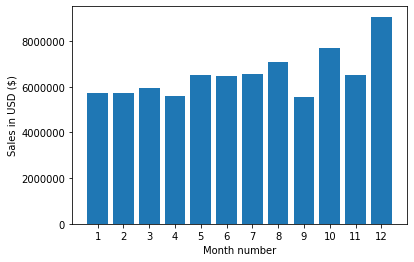

In [22]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,df.groupby(['Month 2']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?

In [23]:
df.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month 2,Sales
City,,,,
Banglore (KA),31152,1.286910e+07,210395,1.290343e+07
Delhi (UT),24714,1.021813e+07,167912,1.024730e+07
Hyderabad (TN),55612,2.304241e+07,377533,2.309789e+07
chennai (T),18644,7.744964e+06,126105,7.764190e+06
pune (M),21715,9.076519e+06,147256,9.093969e+06
vizag (AP),36750,1.521643e+07,248715,1.526145e+07


In [24]:
df.groupby(['City']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Sales
City,,,,,,,,
Banglore (KA),30760,30760,30760,30760,30760,30760,30760,30760
Delhi (UT),24438,24438,24438,24438,24438,24438,24438,24438
Hyderabad (TN),54965,54965,54965,54965,54965,54965,54965,54965
chennai (T),18430,18430,18430,18430,18430,18430,18430,18430
pune (M),21476,21476,21476,21476,21476,21476,21476,21476
vizag (AP),36324,36324,36324,36324,36324,36324,36324,36324


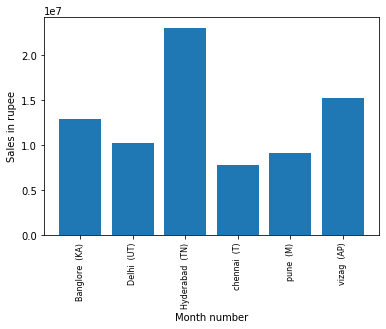

In [25]:
import matplotlib.pyplot as plt

keys = [city for city, df in df.groupby(['City'])]

plt.bar(keys,df.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in rupee' )
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [26]:
# Add hour column
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,City,Sales,Hour,Minute,Count
sno,,,,,,,,,,,,
1,178459,usb-cables,1,50.75,01/04/20 07:13,"973 Main St, Hyderabad, TN 94016",1,Hyderabad (TN),50.75,7,13,1
2,178460,Apple Airpods Headphones,1,150.00,30/04/20 13:43,"808 10th St, Hyderabad, TN 94016",4,Hyderabad (TN),150.00,13,43,1
3,178461,usb-cables,1,50.75,14/04/20 12:37,"640 charminar St, vizag, AP 30301",4,vizag (AP),50.75,12,37,1
4,178462,lg electonics,1,555.25,03/04/20 12:07,"624 7th St, pune, M 73301",3,pune (M),555.25,12,7,1
5,178463,usb-cables,1,50.75,09/04/20 17:16,"129 7th St, Hyderabad, TN 94016",9,Hyderabad (TN),50.75,17,16,1


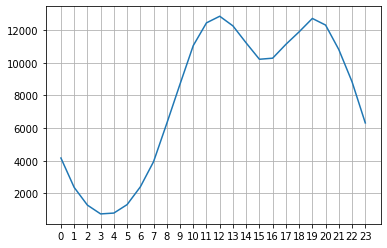

In [27]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [28]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df_1 = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df_1['Grouped'] = df_1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df_1[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('micromax', 'usb-cables') 540
('micromax', 'sony tv') 391
('usb-cables', 'Wired Headphones') 236
('usb-cables', 'usb-cables') 222
('Wired Headphones', 'usb-cables') 208
('Wired Headphones', 'Wired Headphones') 188
('micromax', 'Wired Headphones') 180
('micromax', 'wireless headphones') 114
('usb-cables', 'sony tv') 89
('washing machines', 'Wired Headphones') 77


#### What product sold the most? Why do you think it sold the most?

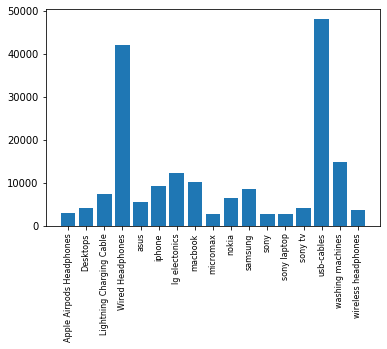

In [30]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


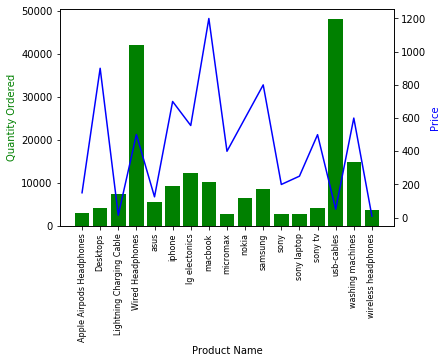

In [31]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

'Wired Headphones','usb-cables' are mostly used and can connect to any devices. they are also cheap. 